In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
plt.rcParams["figure.facecolor"] = "w"

sns.set_style('whitegrid')

#### Иллюстрация с монетой

In [3]:
from scipy.stats import binom

In [4]:
N = 100
N_pos = 45
F_H0 = binom(n=N, p=0.5)
N_pos_available = np.arange(0, 101, 1)
probabilities = F_H0.pmf(N_pos_available)

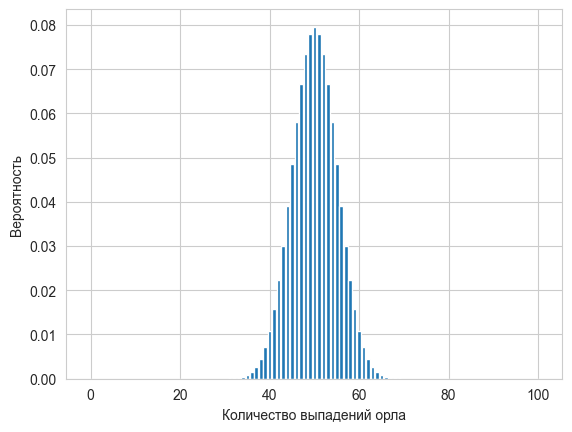

In [5]:
plt.bar(N_pos_available, probabilities)
plt.xlabel('Количество выпадений орла')
plt.ylabel('Вероятность')
plt.show()

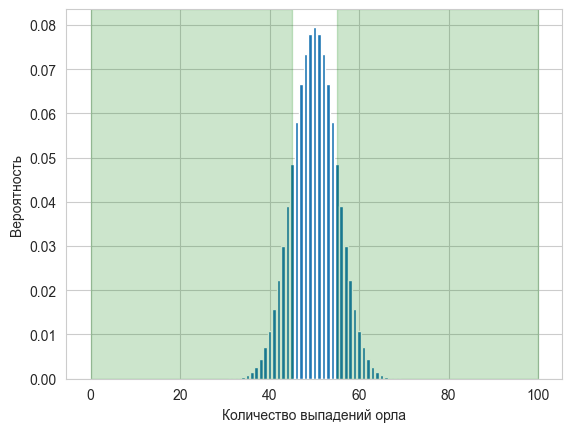

In [6]:
plt.bar(N_pos_available, probabilities)
plt.axvspan(xmin=0, xmax=N_pos, color='green', alpha=0.2)
plt.axvspan(xmin=100-N_pos, xmax=100, color='green', alpha=0.2)
plt.xlabel('Количество выпадений орла')
plt.ylabel('Вероятность')
plt.show()

In [7]:
F_H0.cdf(N_pos) * 2

0.36820161732669565

In [8]:
F_H0.cdf(N_pos) + 1-F_H0.cdf(100-N_pos-1)

0.36820161732669554

In [9]:
from scipy.stats import binom_test

binom_test(x=N_pos, n=N, p=0.5, alternative='two-sided')

0.36820161732669565

Экстремальные значения

In [10]:
thr_l, thr_r = F_H0.ppf(0.025), F_H0.ppf(1-0.025)

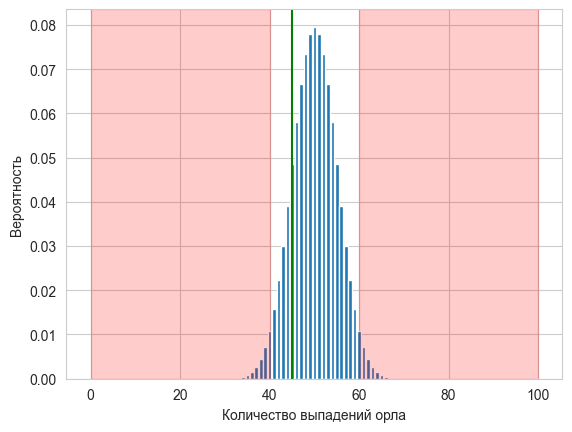

In [11]:
plt.bar(N_pos_available, probabilities)
plt.axvline(x=N_pos, color='green')
plt.axvspan(xmin=0, xmax=thr_l, color='red', alpha=0.2)
plt.axvspan(xmin=thr_r, xmax=100, color='red', alpha=0.2)
plt.xlabel('Количество выпадений орла')
plt.ylabel('Вероятность')
plt.show()

In [12]:
N_pos = 45
N = 100

binom_test(x=N_pos, n=N, p=0.5, alternative='two-sided')

0.36820161732669565

In [13]:
from statsmodels.stats.proportion import proportion_confint

proportion_confint(count=N_pos, nobs=N, alpha=0.05, method='normal')

(0.3524930229100606, 0.5475069770899395)

In [14]:
N_pos = 37
N = 100

binom_test(x=N_pos, n=N, p=0.5, alternative='two-sided')

0.012032975725363479

In [15]:
from statsmodels.stats.proportion import proportion_confint

proportion_confint(count=N_pos, nobs=N, alpha=0.05, method='normal')

(0.27537209443806754, 0.46462790556193245)

#### z-критерий

In [16]:
from scipy.stats import norm

p = N_pos / N
p0 = 0.5
z_n = (p - p0) / np.sqrt(p0 * (1 - p0) / N)

z_n

-2.6

In [17]:
2 * norm(loc=0, scale=1).cdf(z_n)

0.009322376047437493

In [18]:
2 * (1 - norm(loc=0, scale=1).cdf(np.abs(z_n)))

0.009322376047437464

In [19]:
from statsmodels.stats.proportion import proportions_ztest

proportions_ztest(
    count=N_pos,
    nobs=N,
    value=p0,
    alternative='two-sided'
)

(-2.6926023193385333, 0.007089677768050158)

Двувыборочный

In [20]:
N1_pos, N1 = 110, 200
N2_pos, N2 = 120, 205

In [21]:
from statsmodels.stats.proportion import proportions_ztest

proportions_ztest(count=[N1_pos, N2_pos], nobs=[N1, N2], alternative='two-sided')

(-0.7183244402878963, 0.4725572639550033)

#### Сравнение средних

In [22]:
np.random.seed(5)

In [23]:
data = np.random.normal(loc=168, scale=10, size=100)

print('examples:', data[:5])
print('avg:', np.mean(data))

examples: [172.41227487 164.69129848 192.30771187 165.4790787  169.09609842]
avg: 168.91546643867778


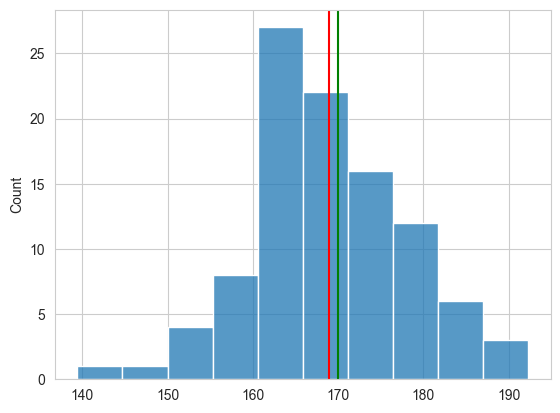

In [24]:
sns.histplot(data)
plt.axvline(x=np.mean(data), color='red')
plt.axvline(x=170, color='green')
plt.show()

In [25]:
from scipy.stats import t

mu0 = 170
N = len(data)

mu = np.mean(data)
std = np.std(data)
t_n = (mu - mu0) / (std / np.sqrt(N))

2 * (1 - t(N-1).cdf(np.abs(t_n)))

0.24684195129398678

In [26]:
from scipy.stats import ttest_1samp

ttest_1samp(a=data, popmean=170, alternative='two-sided')

Ttest_1sampResult(statistic=-1.1591023329681758, pvalue=0.24920261784827893)

#### Иллюстрация про топливо

In [27]:
data = pd.read_csv('measurements.csv', decimal=',')

In [28]:
data.head(10)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
5,8.3,6.4,50,21.5,10,NaN,E10,0,0,0,NaN,NaN
6,7.8,4.4,43,21.5,11,NaN,E10,0,0,0,NaN,NaN
7,12.3,5.0,40,21.5,6,NaN,E10,0,0,0,NaN,NaN
8,4.9,6.4,26,21.5,4,NaN,E10,0,0,0,NaN,NaN
9,11.9,5.3,30,21.5,9,NaN,E10,0,0,0,NaN,NaN


In [29]:
data['consume_rank'] = data.consume.rank()
rn = data[data.gas_type == 'SP98'].consume_rank.sum()

N1 = (data.gas_type == 'SP98').sum()
N2 = (data.gas_type == 'E10').sum()

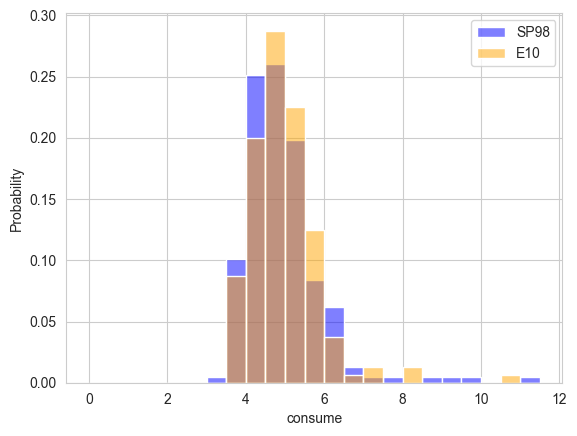

In [30]:
bins = np.arange(0, 12, 0.5)
sns.histplot(
    data[data.gas_type == 'SP98'].consume, bins=bins,
    color='blue', alpha=0.5, label='SP98', stat='probability')
sns.histplot(
    data[data.gas_type == 'E10'].consume, bins=bins,
    color='orange', alpha=0.5, label='E10', stat='probability')
plt.legend(loc=1)
plt.show()

In [31]:
from scipy.stats import ttest_ind

ttest_ind(
    data[data.gas_type == 'SP98'].consume,
    data[data.gas_type == 'E10'].consume,
    equal_var=False,
    alternative='two-sided'
)

Ttest_indResult(statistic=-0.3126464352325148, pvalue=0.7547214058885283)

#### Иллюстрация про связанные выборки

In [32]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123, shuffle=True
)

len(y_test)

102

In [33]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

prediction_linear = Ridge().fit(X_train, y_train).predict(X_test)
prediction_rf = RandomForestRegressor().fit(X_train, y_train).predict(X_test)

In [34]:
error_linear = (y_test - prediction_linear) ** 2
error_rf = (y_test - prediction_rf) ** 2

In [35]:
print('rmse ridge:', np.mean(error_linear) ** 0.5)
print('rmse rf:   ', np.mean(error_rf) ** 0.5)

rmse ridge: 5.378863253217517
rmse rf:    4.316325018654952


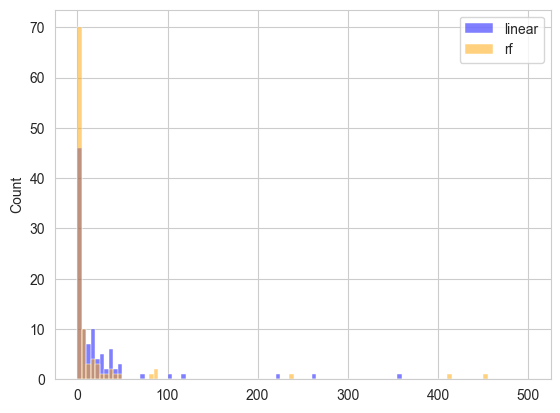

In [36]:
bins = np.arange(0, 501, 5)
sns.histplot(error_linear, bins=bins, color='blue', alpha=0.5, label='linear')
sns.histplot(error_rf, bins=bins, color='orange', alpha=0.5, label='rf')
plt.legend(loc=1)
plt.show()

In [37]:
from scipy.stats import ttest_rel

ttest_rel(error_linear, error_rf, alternative='two-sided')

Ttest_relResult(statistic=1.2821838888946129, pvalue=0.20271335164199253)

#### Проверка нормальности

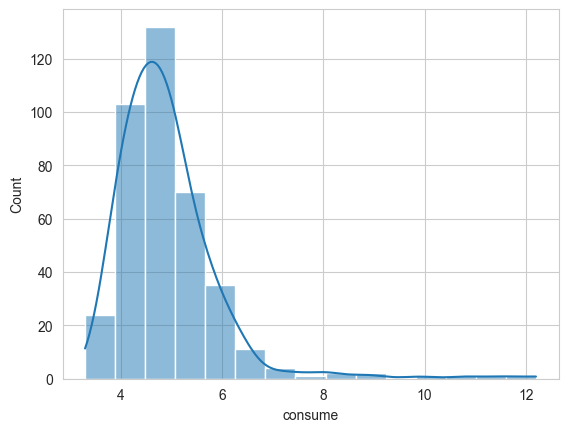

In [38]:
sns.histplot(data.consume, bins=15, kde=True)
plt.show()

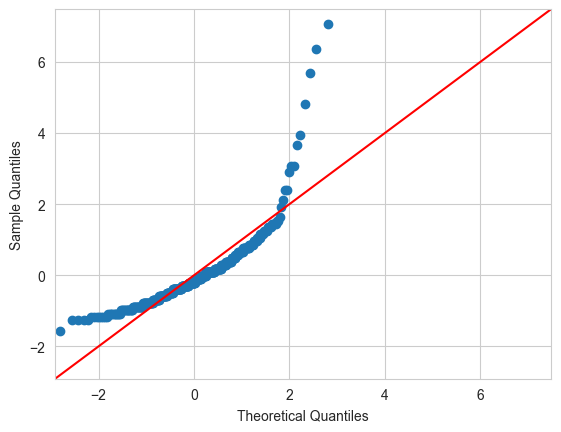

In [39]:
import statsmodels.api as sm

values = (data.consume - data.consume.mean()) / data.consume.std()
sm.qqplot(values, line='45')
plt.show()

In [40]:
from scipy.stats import shapiro

shapiro(data.consume)

ShapiroResult(statistic=0.7749732732772827, pvalue=1.0203466473862174e-22)

#### Библиотеки

In [41]:
# распределения
from scipy.stats import norm, t

# z-тест для долей
from statsmodels.stats.proportion import proportions_ztest

# t-тесты
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel

# Шапиро-Уилк
from scipy.stats import shapiro

## qq-plot
import statsmodels.api as sm